# **Sistema de Recomendación de Netflix**


## Importando Librerias

In [69]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings("ignore")

## Cargando los Datos
Comenzaremos cargando el conjunto de datos e inspeccionando su estructura.


In [7]:
df1 = pd.read_csv('C:/Users/olespejel_externo/Downloads/xd/netflix_movies_detailed_up_to_2025.csv')
df2 = pd.read_csv('C:/Users/olespejel_externo/Downloads/xd/netflix_tv_shows_detailed_up_to_2025.csv')


df1['type'] = 'TV Show'
df2['type'] = 'Movie'

netflix_dataset_2025 = pd.concat([df1, df2], ignore_index=True)

netflix_dataset=pd.read_csv('netflix_dataset.csv')
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_dataset.info()
netflix_dataset_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type     

In [5]:
# Identificar valores unicos
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

dict = {}
for i in list(netflix_dataset_2025.columns):
    dict[i] = netflix_dataset_2025[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769
              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


show_id representa la clave principal de los conjuntos de datos.
Solo hay dos tipos de contenido de Netflix; otros, con una distribución amplia, requieren un análisis más detallado con gráficos.

In [8]:
# Valores faltantes
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

print('Table of missing values: ')
print(netflix_dataset_2025.isnull().sum())

Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
Table of missing values: 
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


## Análisis exploratorio de datos



## Análisis de películas vs programas de televisión

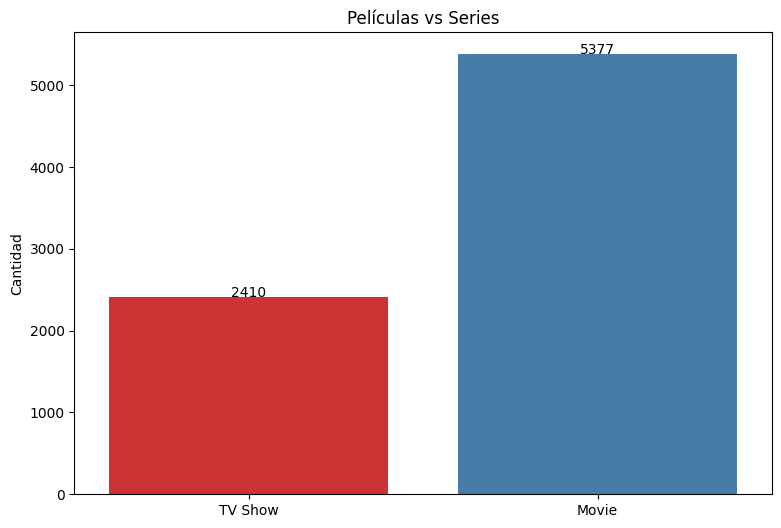

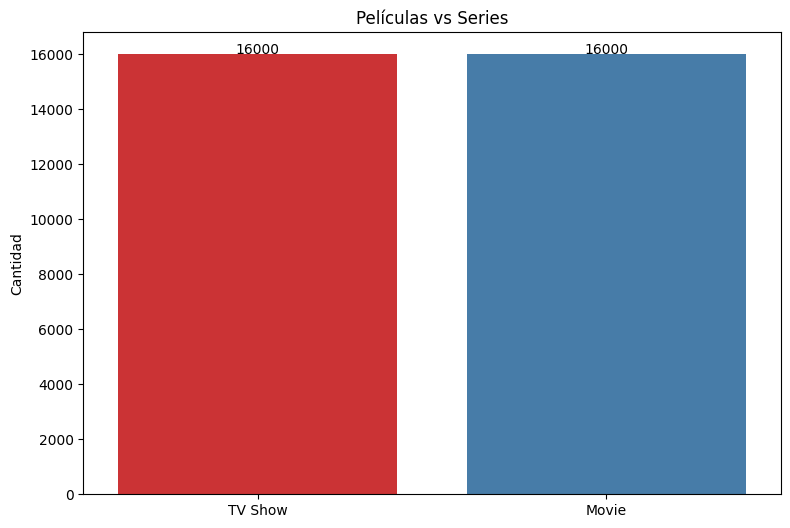

In [9]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

netflix_shows_25=netflix_dataset_2025[netflix_dataset_2025['type']=='TV Show']
netflix_movies_25=netflix_dataset_2025[netflix_dataset_2025['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset_2025, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

## **¿En qué mes un productor puede publicar su contenido? (Mes con menor cantidad de contenido añadido)**

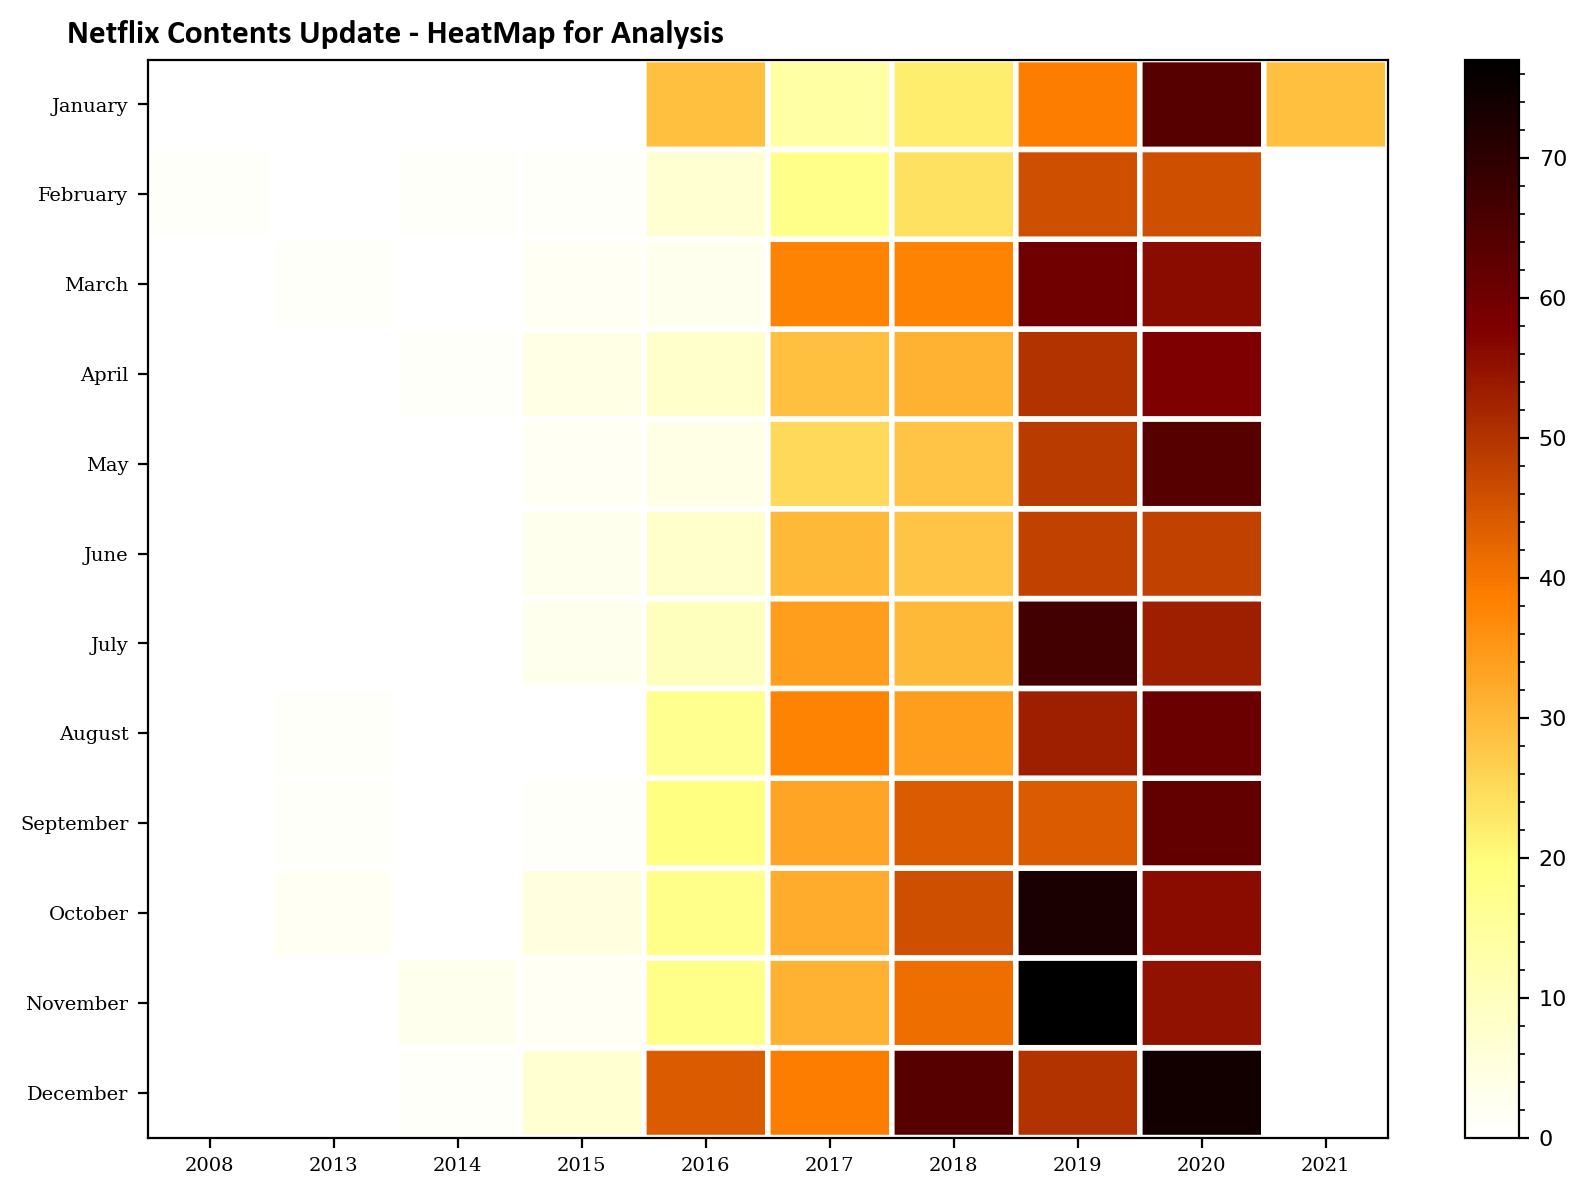

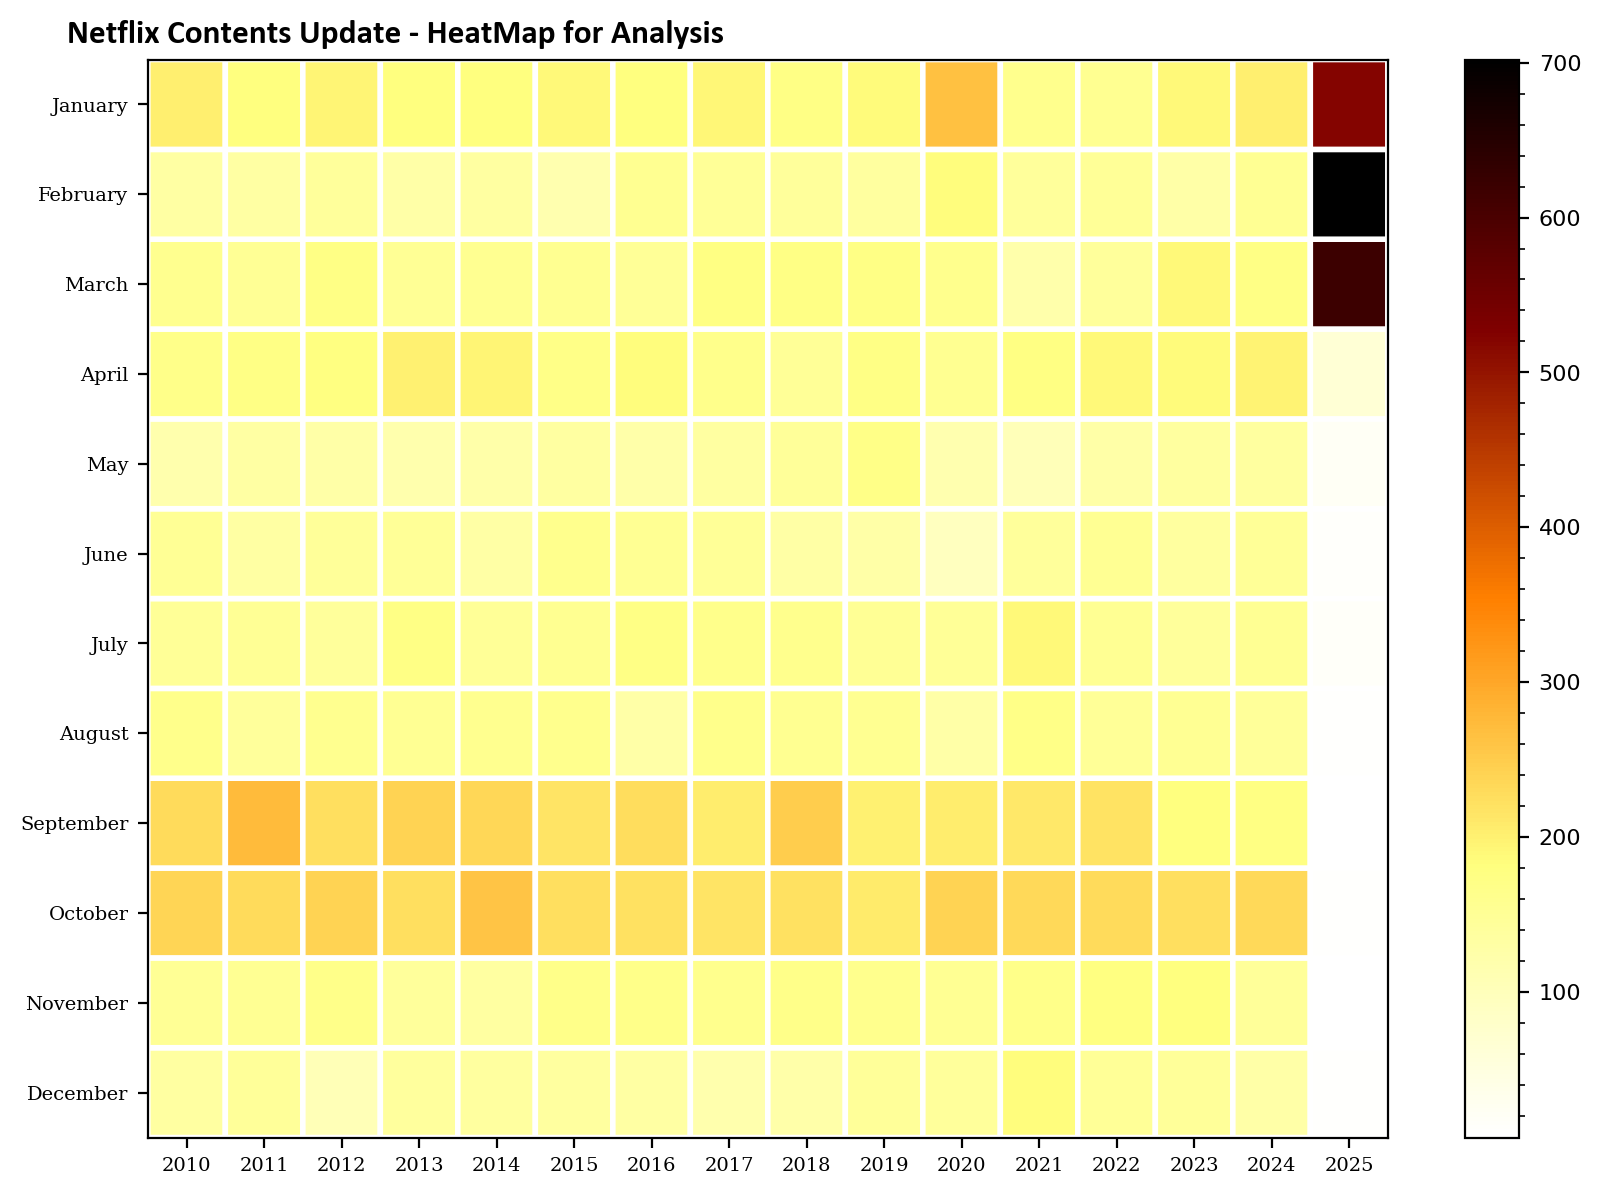

In [10]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Convertir a datetime, ignorar errores
netflix_date = netflix_dataset_2025[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'], errors='coerce')

# Filtrar fechas válidas
netflix_date = netflix_date.dropna()

# Extraer año y nombre del mes
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Orden de meses (de diciembre a enero)
month_order = ['December', 'November', 'October', 'September', 'August', 'July',
               'June', 'May', 'April', 'March', 'February', 'January']

# Agrupar
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Graficar heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.02))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()

## **Análisis de calificaciones de películas**

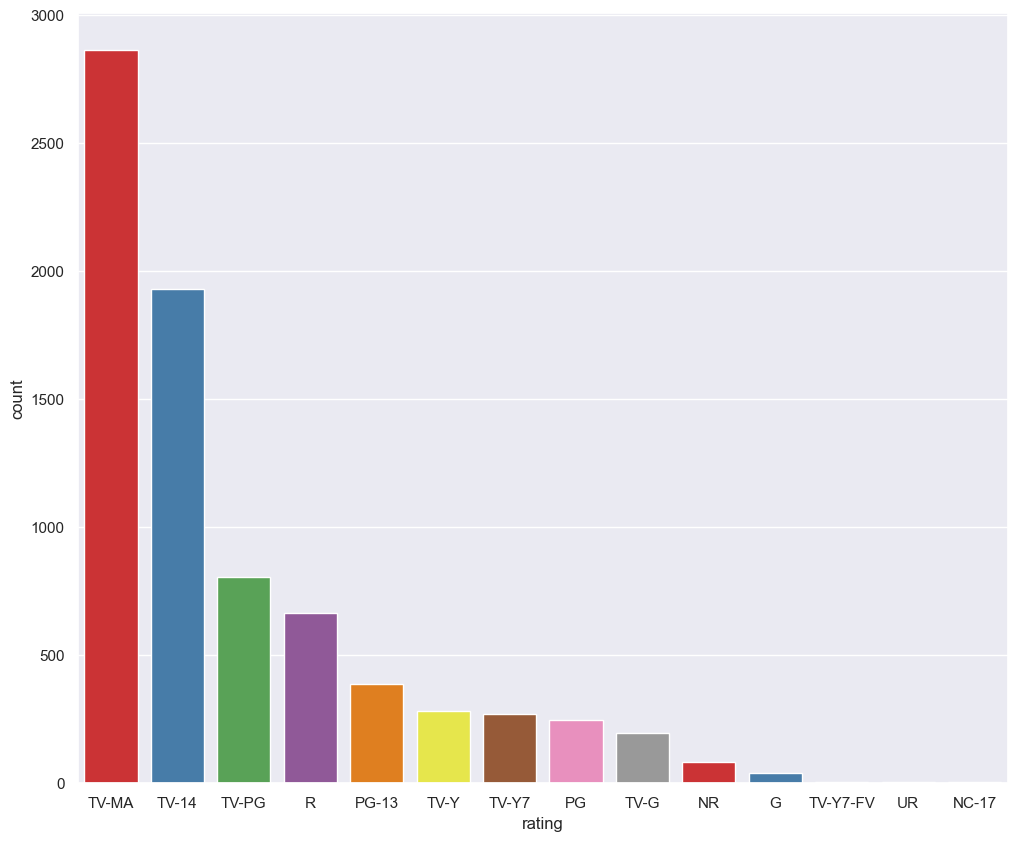

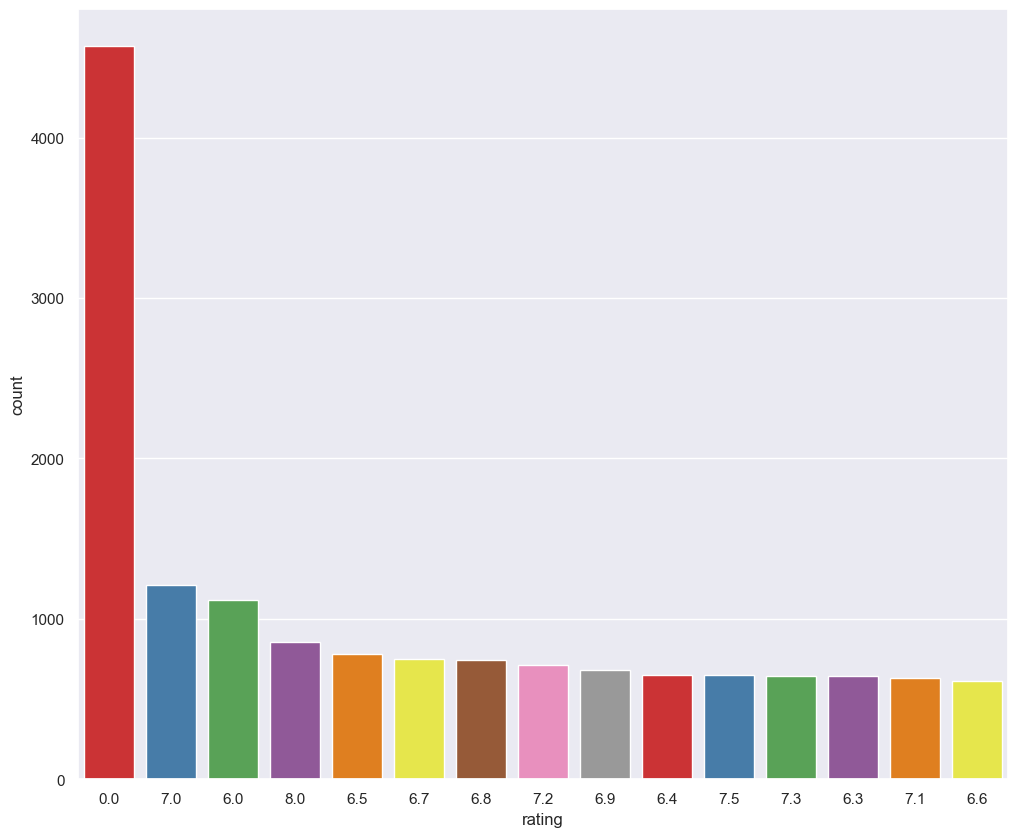

In [11]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset_2025, palette="Set1", order=netflix_dataset_2025['rating'].value_counts().index[0:15])

## **Análisis de las calificaciones de IMDB para obtener las películas mejor valoradas en Netflix**

In [12]:
imdb_ratings=pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [13]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

ratings.dropna()
joint_data_2025=ratings.merge(netflix_dataset_2025,left_on='Title',right_on='title',how='inner')
joint_data_2025=joint_data.sort_values(by='Rating', ascending=False)

## **Las 10 películas con calificación superior en Netflix**

In [17]:
#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data_2025[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

## **Los principales países crean contenido**

In [18]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


In [19]:
#Top countries creating contents


country_count_25=joint_data_2025['country'].value_counts().sort_values(ascending=False)
country_count_25=pd.DataFrame(country_count_25)
topcountries_25=country_count_25[0:11]
topcountries_25

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


## **Análisis anual**

In [20]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [21]:
Last_fifteen_years_25 = netflix_dataset_2025[netflix_dataset_2025['release_year']>2005 ]
Last_fifteen_years_25.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,TV Show,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000.0,752600867.0
1,27205,TV Show,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000.0,839030630.0
2,12444,TV Show,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000.0,954305868.0
3,38757,TV Show,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000.0,592461732.0
4,10191,TV Show,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000.0,494879471.0


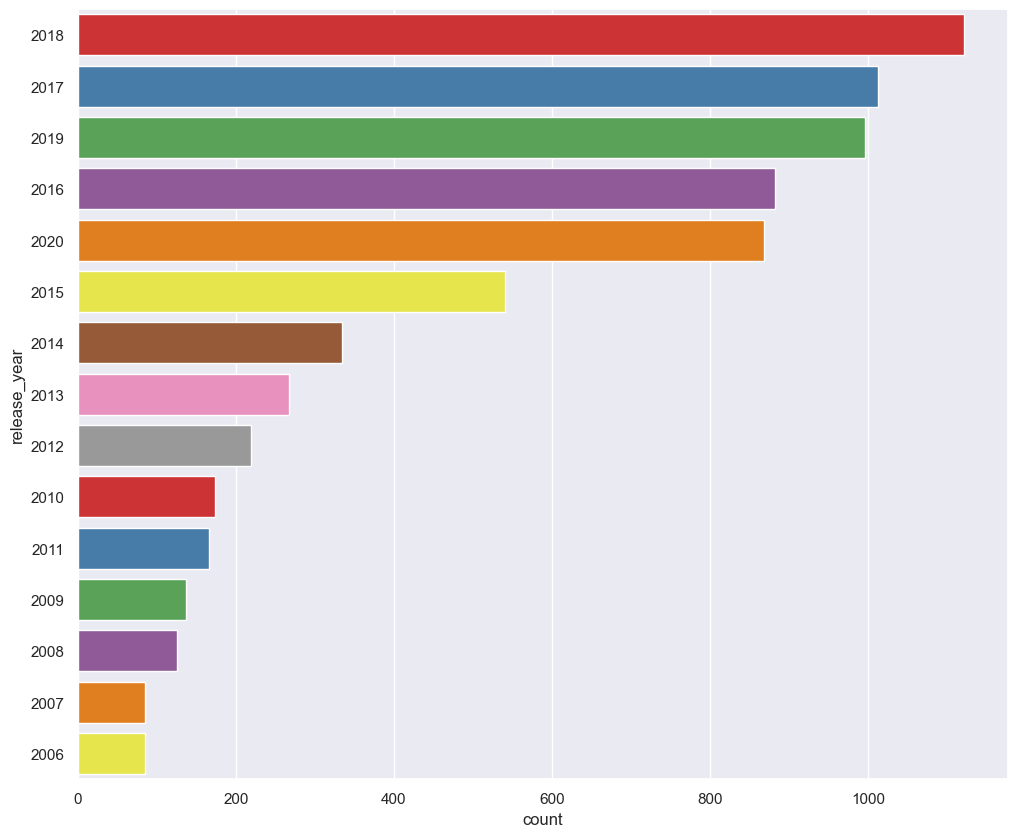

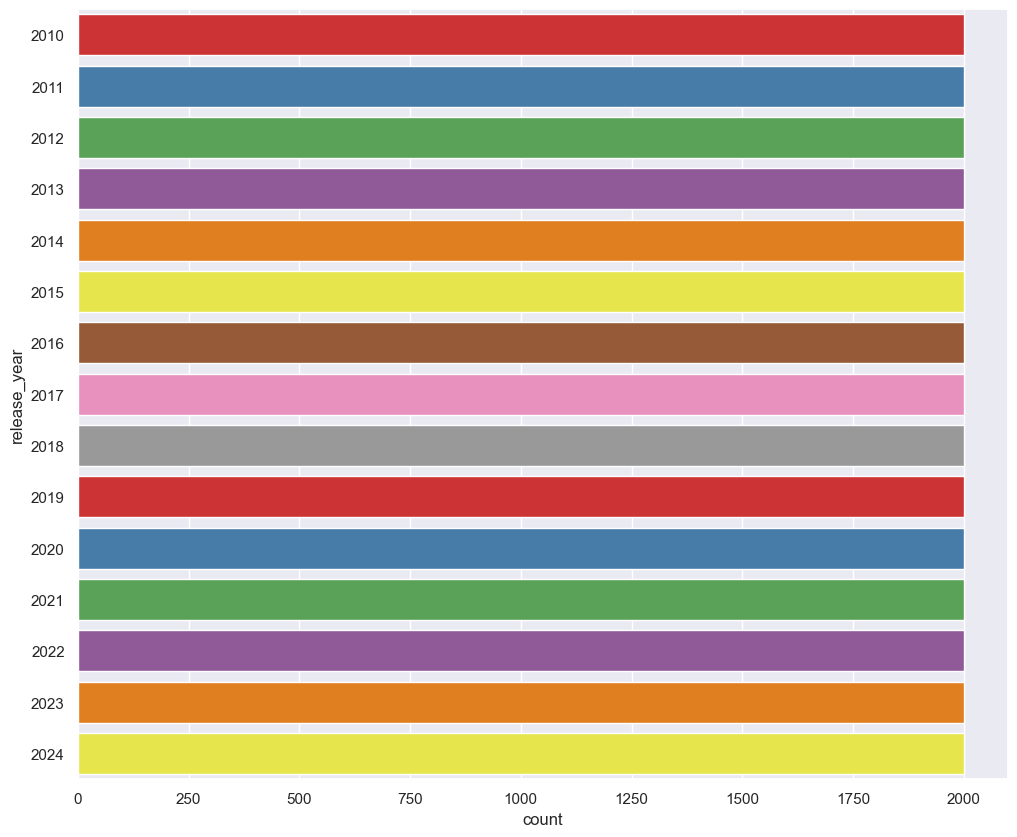

In [22]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(
    y="release_year", 
    data=netflix_dataset_2025, 
    palette="Set1", 
    order=netflix_dataset_2025['release_year'].value_counts().index[0:15]
)

## **Análisis de programas de televisión en Netflix** 

In [23]:
#Analysis of TV Shows in Netflix

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

countries_25={}
netflix_shows_25['country']=netflix_shows_25['country'].fillna('Unknown')
cou=list(netflix_shows_25['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries_25.keys()):
            countries_25[i]+=1
        else:
            countries_25[i[0]]=1
    else:
        for j in i:
            if j in list(countries_25.keys()):
                countries_25[j]+=1
            else:
                countries_25[j]=1

In [24]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

countries_fin_25={}
for country,no in countries_25.items():
    country=country.replace(' ','')
    if country in list(countries_fin_25.keys()):
        countries_fin_25[country]+=no
    else:
        countries_fin_25[country]=no
        
countries_fin_25={k: v for k, v in sorted(countries_fin_25.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'Spain'),
 Text(5, 0, 'Italy'),
 Text(6, 0, 'Sweden'),
 Text(7, 0, 'HongKong'),
 Text(8, 0, 'Canada'),
 Text(9, 0, 'Switzerland')]

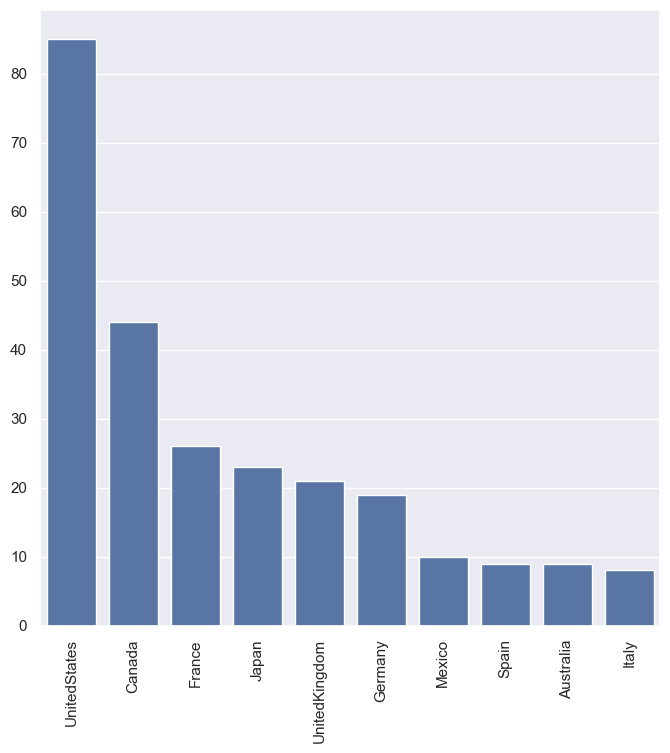

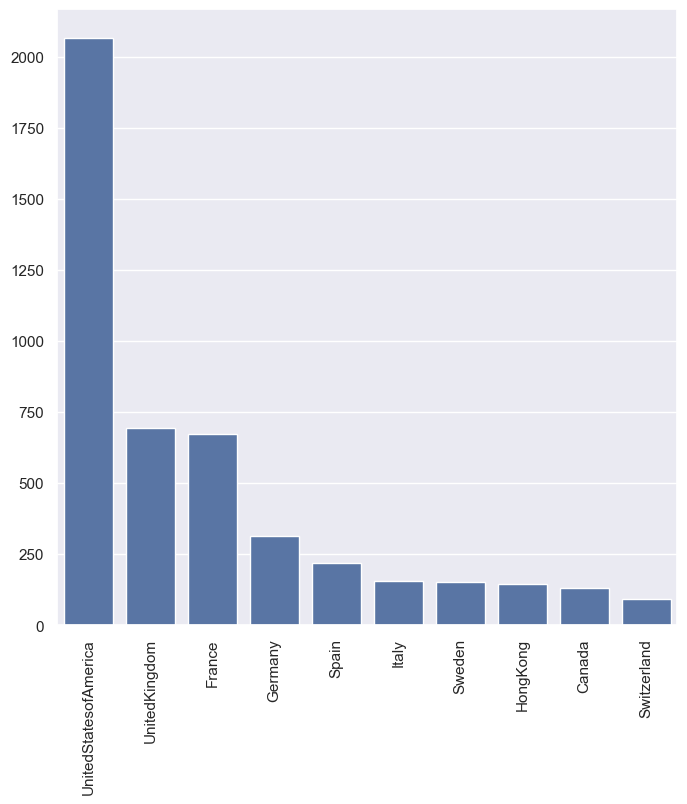

In [25]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin_25.keys())[0:10],y=list(countries_fin_25.values())[0:10])
ax.set_xticklabels(list(countries_fin_25.keys())[0:10],rotation = 90)


Estados Unidos tiene la mayor cantidad de contenidos de programas de televisión creados en Netflix.

## **Análisis de la duración de las películas** 

In [26]:
#Analysis of duration of movies

netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

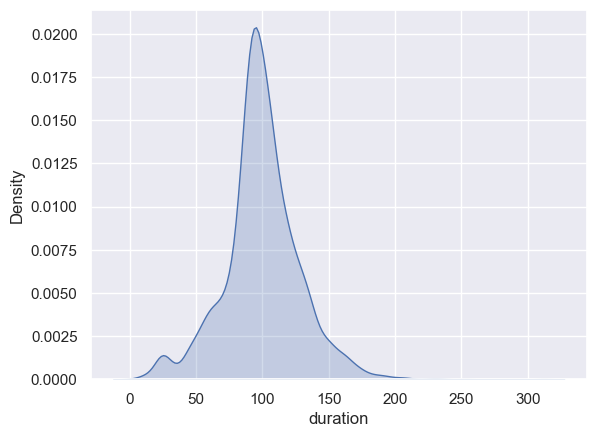

In [27]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)


Por lo tanto, una buena cantidad de películas en Netflix tienen una duración de entre 75 y 120 minutos. Es aceptable considerando que una gran parte de la audiencia no puede ver una película de 3 horas de una sola vez.

## **Análisis de la duración de los programas de televisión**

In [28]:
#Analysis of duration of TV shows

features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

features_25=['title','duration']
durations_25= netflix_shows_25[features]

durations_25['no_of_seasons']=durations_25['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations_25['no_of_seasons']=durations_25['no_of_seasons'].str.replace('s','')

In [41]:
# Reemplaza NaN con 0 antes de convertir a entero
durations['no_of_seasons'] = durations['no_of_seasons'].fillna(0).astype(int)
durations_25['no_of_seasons'] = durations_25['no_of_seasons'].fillna(0).astype(int)


In [42]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

t25=['title','no_of_seasons']
top_25=durations_25[t25]

top_25=top_25.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

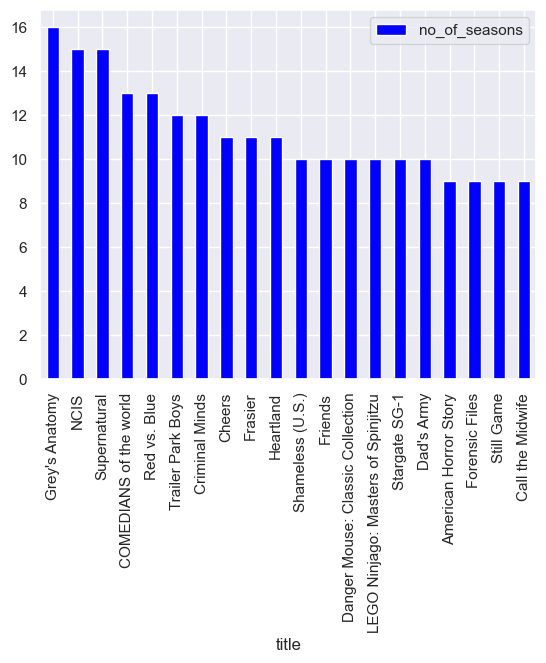

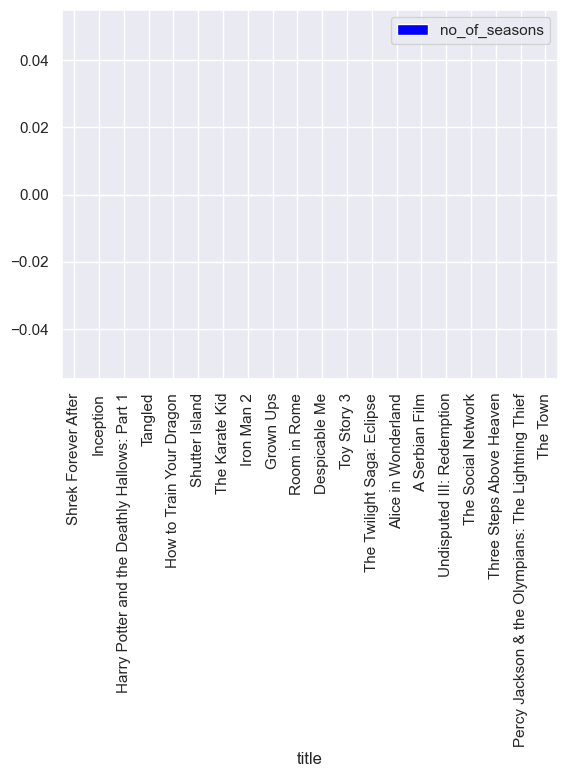

In [44]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

top20=top_25[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

# **Sistema de recomendación basado en contenido** 

## **Recomendador basado en la descripción de la trama (Recomendaciones basadas en contenido)**

Calcularemos puntuaciones de similitud por pares para todas las películas según sus descripciones argumentales y recomendaremos películas según dicha puntuación. La descripción de la trama se proporciona en la sección **descripción** de nuestro conjunto de datos. Analicemos los datos...

In [45]:
#Plot description based Recommender (Content Based Recommendations)

netflix_dataset['description'].head()

# netflix_dataset_2025['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

In [46]:
# Plot description based Recommender (Content Based Recommendations)

# Combinar TODOS los 3 datasets en uno solo
netflix_original = pd.read_csv("netflix_dataset.csv")
netflix_movies_2025 = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")
netflix_shows_2025 = pd.read_csv("netflix_tv_shows_detailed_up_to_2025.csv")

# Crear un dataset completamente unificado con los 3
all_netflix_data = pd.concat([
    netflix_original,
    netflix_movies_2025,
    netflix_shows_2025
], ignore_index=True)

# Eliminar duplicados si los hay
all_netflix_data = all_netflix_data.drop_duplicates()

print(f"Dataset original: {len(netflix_original)} registros")
print(f"Movies 2025: {len(netflix_movies_2025)} registros") 
print(f"Shows 2025: {len(netflix_shows_2025)} registros")
print(f"Total combinado: {len(all_netflix_data)} registros")

# Mostrar las primeras descripciones del dataset unificado
all_netflix_data['description'].head()

# Información adicional sobre las descripciones
print(f"\nDescripciones válidas (no nulas): {all_netflix_data['description'].notna().sum()}")
print(f"Descripciones faltantes: {all_netflix_data['description'].isna().sum()}")

print("\nPrimeras 5 descripciones:")
for i, desc in enumerate(all_netflix_data['description'].head().values, 1):
    if pd.notna(desc):
        print(f"{i}. {desc[:100]}...")  # Mostrar solo primeros 100 caracteres
    else:
        print(f"{i}. [Sin descripción]")

Dataset original: 7787 registros
Movies 2025: 16000 registros
Shows 2025: 16000 registros
Total combinado: 39787 registros

Descripciones válidas (no nulas): 36449
Descripciones faltantes: 3338

Primeras 5 descripciones:
1. In a future where the elite inhabit an island paradise far from the crowded slums, you get one chanc...
2. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be...
3. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret t...
4. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate ...
5. A brilliant group of students become card-counting experts with the intent of swindling millions out...


In [70]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset['description'] = netflix_dataset['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
tfidf_matrix.shape


# Cargar datos y crear TF-IDF (ya es disperso por defecto)
tfidf_25 = TfidfVectorizer(stop_words='english')
netflix_dataset_2025['description'] = netflix_dataset_2025['description'].fillna('NaN')
tfidf_matrix_25 = tfidf_25.fit_transform(netflix_dataset_2025['description'])

# Verificar el tipo de matriz (debe ser CSR o similar)
print(type(tfidf_matrix_25))  # Debería ser <class 'scipy.sparse.csr_matrix'>

# Convertir a float32 para ahorrar memoria (opcional)
tfidf_matrix_25 = tfidf_matrix_25.astype(np.float32)
tfidf_matrix_25.shape

<class 'scipy.sparse._csr.csr_matrix'>


(32000, 54565)

In [71]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Solución: Tomar una muestra de 12,000 contenidos
print(f"Dataset completo: {len(all_netflix_data)} contenidos")
print("Tomando muestra de 21,000 contenidos...")

# Tomar una muestra aleatoria de 22,000 contenidos
sample_size = 21000
netflix_sample = all_netflix_data.sample(n=min(sample_size, len(all_netflix_data)), random_state=42)

# Recrear TF-IDF para la muestra
tfidf_sample = TfidfVectorizer(stop_words='english')
netflix_sample_descriptions = netflix_sample['description'].fillna('')
tfidf_matrix_sample = tfidf_sample.fit_transform(netflix_sample_descriptions)

print(f"Muestra procesada: {tfidf_matrix_sample.shape[0]} contenidos")

# Compute the cosine similarity matrix (ahora con 12k contenidos)
cosine_sim = linear_kernel(tfidf_matrix_sample, tfidf_matrix_sample)

print(f"✅ Matriz de similitud calculada: {cosine_sim.shape}")
print(f"Memoria estimada: {cosine_sim.nbytes / (1024**2):.2f} MB")

Dataset completo: 39787 contenidos
Tomando muestra de 21,000 contenidos...
Muestra procesada: 21000 contenidos
✅ Matriz de similitud calculada: (21000, 21000)
Memoria estimada: 3364.56 MB


In [72]:
f5 = tfidf_matrix[:5]
l5 = tfidf_matrix[-5:]
f5_dense = f5.toarray()
l5_dense = l5.toarray()
feature_names = tfidf.get_feature_names_out()
df_f5 = pd.DataFrame(f5_dense, columns=feature_names)
df_l5 = pd.DataFrame(l5_dense, columns=feature_names)
display(df_f5)
display(df_l5)

,000,007,009,10,100,1000,102,10th,11,112,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,000,007,009,10,100,1000,102,10th,11,112,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.208147,0.0,0.0,0.0,0.235683,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity
from scipy.sparse import csr_matrix

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Calcular similitud fila por fila
cosine_sim_25 = linear_kernel(tfidf_matrix_25, tfidf_matrix_25)


Vamos a definir una función que toma el título de una película como entrada y genera una lista de las 10 películas más similares. Para ello, necesitamos una asignación inversa de los títulos de las películas a los índices del DataFrame. En otras palabras, necesitamos un mecanismo para identificar el índice de una película en nuestro DataFrame de Netflix, dado su título.

In [74]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

# indices_25 = pd.Series(netflix_dataset_2025.index, index=netflix_dataset_2025['title']).drop_duplicates()
indices_25 = pd.Series(netflix_dataset_2025.index, index=netflix_dataset_2025['title'].str.strip().str.lower())


**Ahora estamos en condiciones de definir nuestra función de recomendación. Seguiremos los siguientes pasos:¨**

1. Obtener el índice de la película según su título.
2. Obtener la lista de puntuaciones de similitud de coseno para esa película en particular con todas las películas. Convertirla en una lista de tuplas donde el primer elemento es su posición y el segundo es la puntuación de similitud.
3. Ordenar la lista de tuplas mencionada anteriormente según las puntuaciones de similitud; es decir, el segundo elemento.
4. Obtener los 10 primeros elementos de esta lista. Ignorar el primer elemento, ya que se refiere a sí misma (la película más similar a una película en particular es la propia película).
5. Devolver los títulos correspondientes a los índices de los primeros elementos.

In [75]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        print(f"❌ Title '{title}' not found in dataset!")
        return None
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

def get_recommendations_25(title, cosine_sim=cosine_sim_25):
    title = title.strip().lower()
    
    if title not in indices_25:
        print(f"❌ Title '{title}' not found in dataset!")
        return None

    idx = indices_25[title]
    sim_scores_25 = list(enumerate(cosine_sim_25[idx]))
    sim_scores_25 = sorted(sim_scores_25, key=lambda x: x[1], reverse=True)
    sim_scores_25 = sim_scores_25[1:11]
    movie_indices = [i[0] for i in sim_scores_25]

    return netflix_dataset_2025['title'].iloc[movie_indices]


### Peliculas buscadas en netflix no actualizado


In [76]:
get_recommendations('Welcome')

1761                  Dil Vil Pyaar Vyaar
6782                The Princess Weiyoung
866                               Bewafaa
3082                     It's Okay, Buddy
7245                           True Tunes
2472                             Gomorrah
302                      Acts of Violence
3859                          Magnificent
4938    Power Rangers Operation Overdrive
4692                        Our Godfather
Name: title, dtype: object

In [77]:
get_recommendations('Avengers: Infinity War')

6920                              The Talented Mr. Ripley
6270                                         The Darkness
400                                Aliens Ate My Homework
3589              LEGO Marvel Super Heroes: Black Panther
1338                       Chilling Adventures of Sabrina
7446                                              Vroomiz
4678                                            Orbiter 9
1448                                           Code Lyoko
7388                                             Vampires
3590    LEGO Marvel Super Heroes: Guardians of the Galaxy
Name: title, dtype: object

In [78]:
get_recommendations('Dil Dhadakne Do')

6464                     The House of Flowers
4603                                Old Money
377                                     Alelí
593                           Ascharyachakit!
5171                                  Results
1123                                 Budapest
3916                           Mansfield Park
5662        Sleepless Society: Bedtime Wishes
1192                         Can You Hear Me?
3583    LEGO Friends: The Power of Friendship
Name: title, dtype: object

In [79]:
get_recommendations_25('Call me by your name')

23013                                     GOING SEVENTEEN
3866                                        Gerontophilia
24810                  Meraviglie. La penisola dei tesori
30253                                              RIPLEY
788      Genitori & figli:) - Agitare bene prima dell'uso
760                                          Love & Slaps
30437                                                Eric
4537                                      Happy Christmas
8809                                       Going for Gold
21263                                          Reply 1988
Name: title, dtype: object

In [80]:
get_recommendations('Wall-E')

❌ Title 'Wall-E' not found in dataset!


In [105]:
get_recommendations_new('Dexter')

532                     Anjaan
7356           Unrequited Love
4824                Peppermint
689        Bad Day for the Cut
3317                     Katha
2236                  Forensic
3443              Kraftidioten
1449    Code Name: The Cleaner
4290              Murder Party
960                 Black Rose
Name: title, dtype: object

In [102]:
get_recommendations_new('Stranger Things')

5289               Rowdy Rathore
5349             Sakho & Mangane
6098     The Autopsy of Jane Doe
907                Big Stone Gap
1468            Come and Find Me
2188                   FirstBorn
2625                 Hardy Bucks
6885                 The Society
5634             Sinister Circle
5618    Sin Senos sí Hay Paraíso
Name: title, dtype: object

### Peliculas buscadas en netflix 2025

In [100]:
get_recommendations_new('Welcome', cosine_sim2)

6016            Tees Maar Khan
6863             The Shaukeens
1740        Dhoondte Reh Jaoge
3215                     Joker
2862    Humko Deewana Kar Gaye
354                    Aitraaz
6042                 Thank You
3874     Maine Pyaar Kyun Kiya
4846           Phir Hera Pheri
5052                      Race
Name: title, dtype: object

In [99]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7058                               Thor: Ragnarok
5698                      Solo: A Star Wars Story
2700                                          Her
5118                                   Real Steel
5699    Solo: A Star Wars Story (Spanish Version)
959                                 Black Panther
3006                                     Inkheart
5632                                  Singularity
1741                   Di Renjie zhi Sidatianwang
2586                      Halo: The Fall of Reach
Name: title, dtype: object

In [98]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

7769    Zindagi Na Milegi Dobara
362                     AK vs AK
6878             The Sky Is Pink
1757              Dil Chahta Hai
3912                        Mann
4872                          PK
2571                      Haapus
886               Bhangra Paa Le
5954            Taare Zameen Par
1261             Chal Dhar Pakad
Name: title, dtype: object

In [95]:
get_recommendations_25('Call me by your name')

23013                                     GOING SEVENTEEN
3866                                        Gerontophilia
24810                  Meraviglie. La penisola dei tesori
30253                                              RIPLEY
788      Genitori & figli:) - Agitare bene prima dell'uso
760                                          Love & Slaps
30437                                                Eric
4537                                      Happy Christmas
8809                                       Going for Gold
21263                                          Reply 1988
Name: title, dtype: object

In [96]:
get_recommendations_25('Wall-E')

❌ Title 'wall-e' not found in dataset!


In [97]:
get_recommendations_new('Dexter')

532                     Anjaan
7356           Unrequited Love
4824                Peppermint
689        Bad Day for the Cut
3317                     Katha
2236                  Forensic
3443              Kraftidioten
1449    Code Name: The Cleaner
4290              Murder Party
960                 Black Rose
Name: title, dtype: object

In [91]:
get_recommendations_new('Stranger Things')

5289               Rowdy Rathore
5349             Sakho & Mangane
6098     The Autopsy of Jane Doe
907                Big Stone Gap
1468            Come and Find Me
2188                   FirstBorn
2625                 Hardy Bucks
6885                 The Society
5634             Sinister Circle
5618    Sin Senos sí Hay Paraíso
Name: title, dtype: object

Si bien nuestro sistema ha realizado un buen trabajo al encontrar películas con argumentos similares, la calidad de las recomendaciones no es muy buena. "Bienvenido" muestra películas con una descripción similar, mientras que es más probable que quienes disfrutaron de esa película también disfruten de otras películas de Akshay Kumar. Esto es algo que el sistema actual no puede capturar.

Por lo tanto, se han añadido más métricas al modelo para mejorar el rendimiento.

### Filtrado de contenido basado en múltiples métricas

Filtrado de contenido basado en los siguientes factores:

* Título
* Reparto
* Director
* Aparece en
* Argumento

In [ ]:
#Filling null values with empty string.
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


El siguiente paso sería convertir los nombres y las instancias de palabras clave a minúsculas y eliminar todos los espacios entre ellos. Esto se hace para que nuestro vectorizador no considere a Johnny de "Johnny Depp" y "Johnny Galecki" como el mismo.

In [ ]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [ ]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


Ahora estamos en condiciones de crear nuestra "sopa" o "bolsa de palabras" para todas las filas, que es una cadena que contiene todos los metadatos que queremos alimentar a nuestro vectorizador (es decir, actores, director y palabras clave).


In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

Los siguientes pasos son los mismos que los que utilizamos con nuestro recomendador basado en la descripción de la trama.

Una diferencia importante es que usamos CountVectorizer() en lugar de TF-IDF. Esto se debe a que no queremos restar importancia a la presencia de un actor/director si ha actuado o dirigido en un número relativamente mayor de películas. Esto no tiene mucho sentido intuitivo.

In [82]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [83]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [84]:
# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [85]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

Observamos que nuestro recomendador ha logrado capturar más información gracias a más metadatos y nos ha proporcionado (posiblemente) mejores recomendaciones.

In [86]:
import sys
print(sys.executable)


c:\Users\olespejel_externo\AppData\Local\Programs\Python\Python313\python.exe
